In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('/Users/tomerlev/sourcetree/pj-analysis/Maximize Conversion Experiment/Book1.csv')
df['Customer ID'] = df['Customer ID'].astype(object)
df

Customer ID         Experiment  Base Clicks  Trial Clicks  Base Cost  \
0        42509      Allentown, PA            5            89       0.75   
1        42509     Buean Park, CA         1124          1680     306.11   
2        42509      Charlotte, NC          218           821     163.06   
3        42509      Galveston. TX            0            66       0.00   
4        42509    Kansas City, MO           37            73      39.86   
5        42509          Mason, OH          117           148      36.32   
6        42509  New Braunfels, TX            0            82       0.00   
7        42509       Sandusky. OH           13           177       2.76   
8        42509    Santa Clara, CA           89           372      68.19   
9        42509       Shakpoee, MN            0            39       0.00   
10       42509    Vaughan, ON, CA           54           182      56.09   
11       42509      San Diego, CA          612           502     542.61   
12       42509         Denver, CO          211           439     301.57   
13        1187       Portland, OR          240           133     337.99   
14        1187   Jacksonville, FL          226            62     235.36   
15        1187         Dallas, TX           35            55      15.33   
16        1187      Nashville, TN          252           501     293.13   
17        1187     Pittsburgh, PA           53           210      64.04   
18          61        Batavia, IL            9            68      13.55   
19          61  Center Valley, PA            0            45       0.00   
20          61        Fishers, IN            6            25      11.13   
21       40921      Charlotte, NC          434           646     822.77   
22       40921         Tucson, AZ          231           255     397.17   
23       33647        Mankato, MN           88           447     196.68   
24       33647      Rochester, MN          228           619     485.86   

    Trial Cost  Base AC  Trial AC  Base CPAC   Trial CPAC  ...  \
0        92.20     2.00     61.00   0.375000     1.511475  ...   
1      1342.99   907.80   1158.98   0.337200     1.158769  ...   
2      1567.87   140.00    338.93   1.164714     4.625940  ...   
3       158.00     0.00     20.00        NaN     7.900000  ...   
4       141.00    10.00     40.00   3.986000     3.525000  ...   
5       157.05   105.00    104.00   0.345905     1.510096  ...   
6       134.66     0.00     30.00        NaN     4.488667  ...   
7      1107.20    13.00     54.00   0.212308    20.503704  ...   
8       780.21    46.00    149.00   1.482391     5.236309  ...   
9        55.96     0.00     13.00        NaN     4.304615  ...   
10      203.91    12.00     63.00   4.674167     3.236667  ...   
11      651.70    38.72    147.57  14.013688     4.416209  ...   
12      931.72    24.77    123.81  12.174808     7.525402  ...   
13      495.01     0.00      0.00        NaN          NaN  ...   
14       72.33     0.00      0.00        NaN          NaN  ...   
15      125.87     0.00      0.00        NaN          NaN  ...   
16     2818.45     0.00      1.00        NaN  2818.450000  ...   
17     1055.45     0.00      0.00        NaN          NaN  ...   
18      188.50     5.00     33.00   2.710000     5.712121  ...   
19      139.87     0.00     26.00        NaN     5.379615  ...   
20       51.99     3.00     12.00   3.710000     4.332500  ...   
21     1192.62    40.00     53.00  20.569250    22.502264  ...   
22      627.12    12.00     13.00  33.097500    48.240000  ...   
23     1950.34     5.00     47.00  39.336000    41.496596  ...   
24     2368.22    47.00     75.00  10.337447    31.576267  ...   

    Difference Cost Conclusive  Difference AC  Difference AC (%)  \
0                        False          59.00          29.500000   
1                         True         251.18           0.276691   
2                         True         198.93           1.420929   
3                        False          20.00                Na

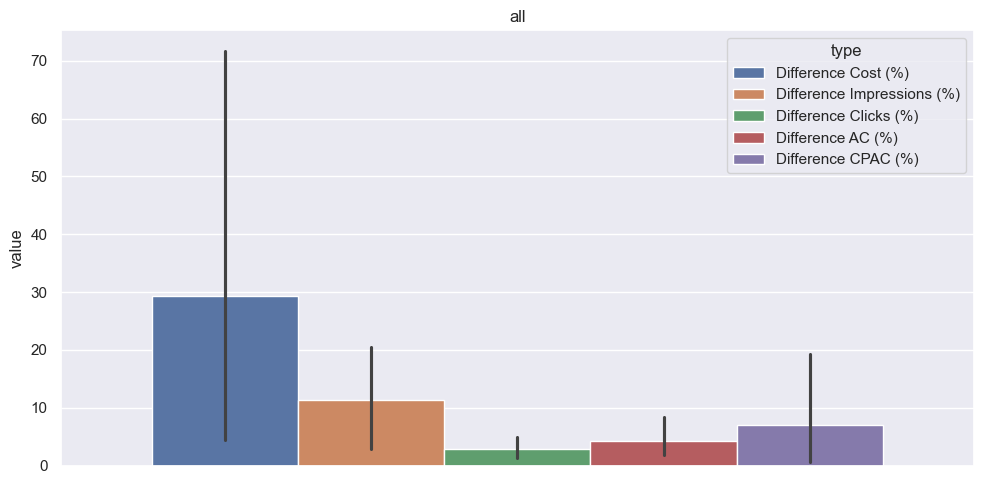

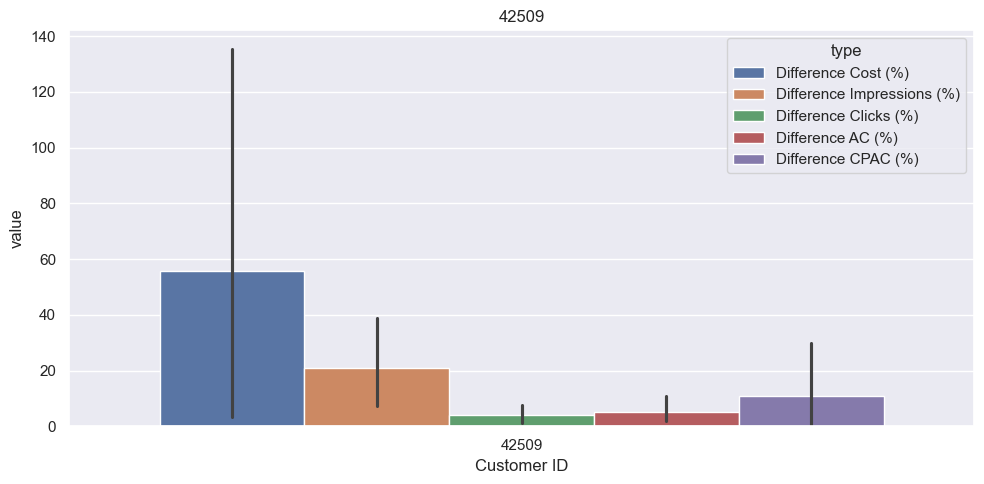

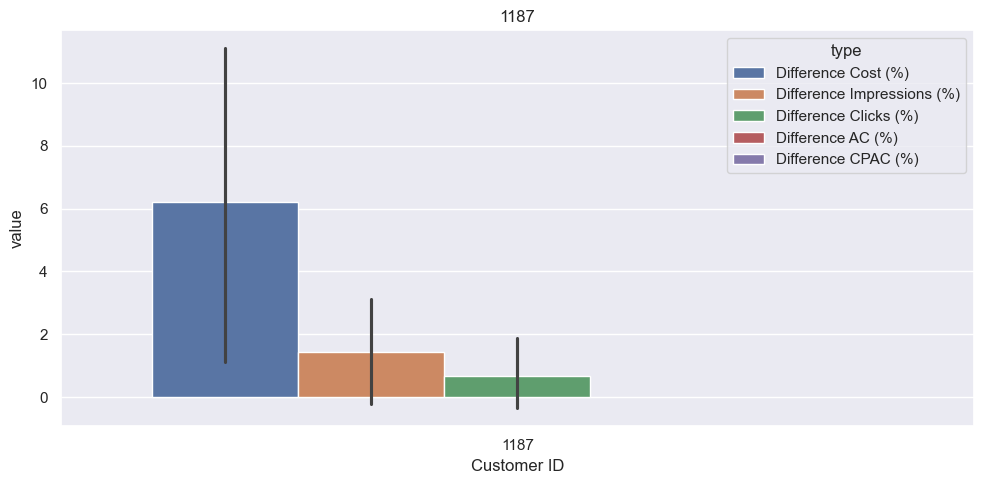

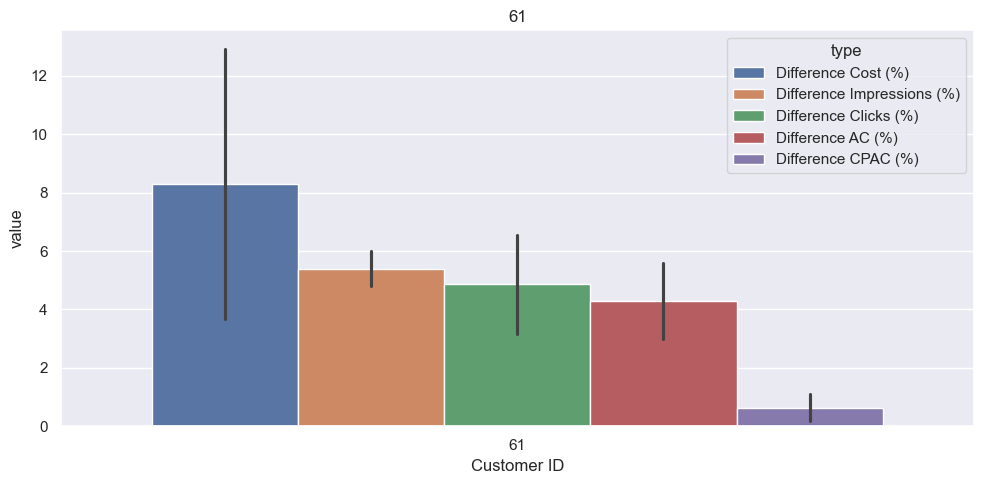

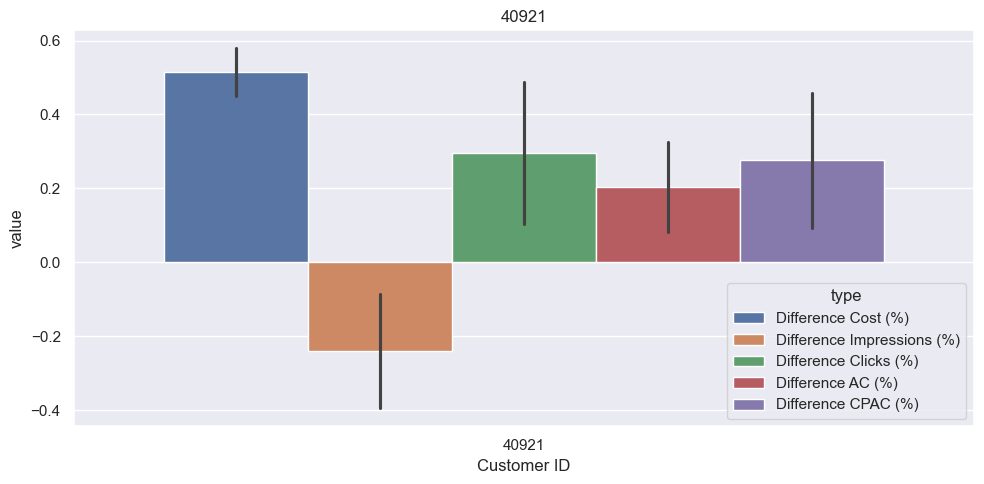

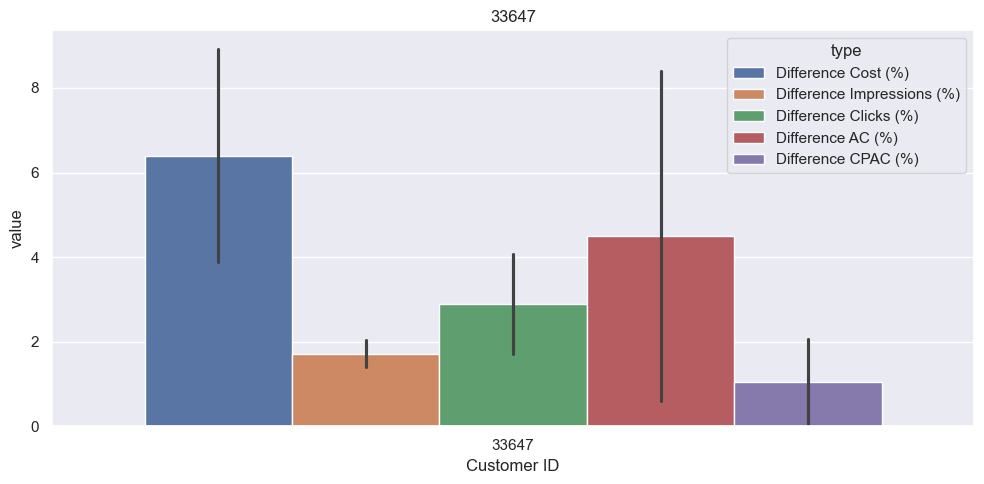

In [3]:
cost = pd.DataFrame(df[['Customer ID','Difference Cost (%)']])
cost['type'] = 'Difference Cost (%)'
cost = cost.rename(columns={'Difference Cost (%)':'value'})

impr = pd.DataFrame(df[['Customer ID','Difference Impressions (%)']])
impr['type'] = 'Difference Impressions (%)'
impr = impr.rename(columns={'Difference Impressions (%)':'value'})

click = pd.DataFrame(df[['Customer ID','Difference Clicks (%)']])
click['type'] = 'Difference Clicks (%)'
click = click.rename(columns={'Difference Clicks (%)':'value'})

ac = pd.DataFrame(df[['Customer ID','Difference AC (%)']])
ac['type'] = 'Difference AC (%)'
ac = ac.rename(columns={'Difference AC (%)':'value'})

cpac = pd.DataFrame(df[['Customer ID','Difference CPAC (%)']])
cpac['type'] = 'Difference CPAC (%)'
cpac = cpac.rename(columns={'Difference CPAC (%)':'value'})

final = pd.concat([cost, impr, click, ac, cpac]).reset_index(drop = True)

plt.figure(figsize = (10, 5))
plt.title('all')
sns.barplot(data = final,
            #x = 'Customer ID', 
            y = 'value',
            hue = 'type')
plt.tight_layout()
plt.show()
for cust in final['Customer ID'].unique():
    plt.figure(figsize = (10, 5))
    plt.title(cust)
    sns.barplot(data = final[final['Customer ID']==cust],
                x = 'Customer ID', 
                y = 'value',
                hue = 'type')
    plt.tight_layout()
    plt.show()

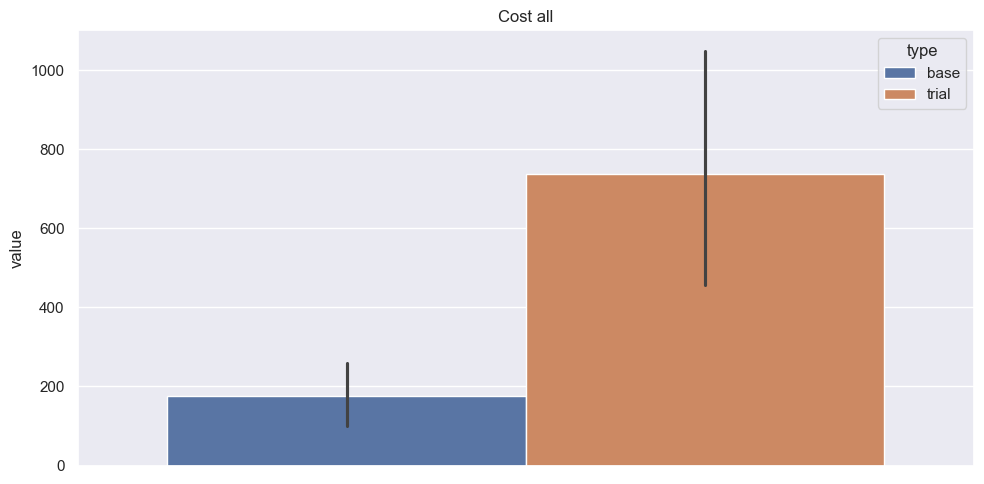

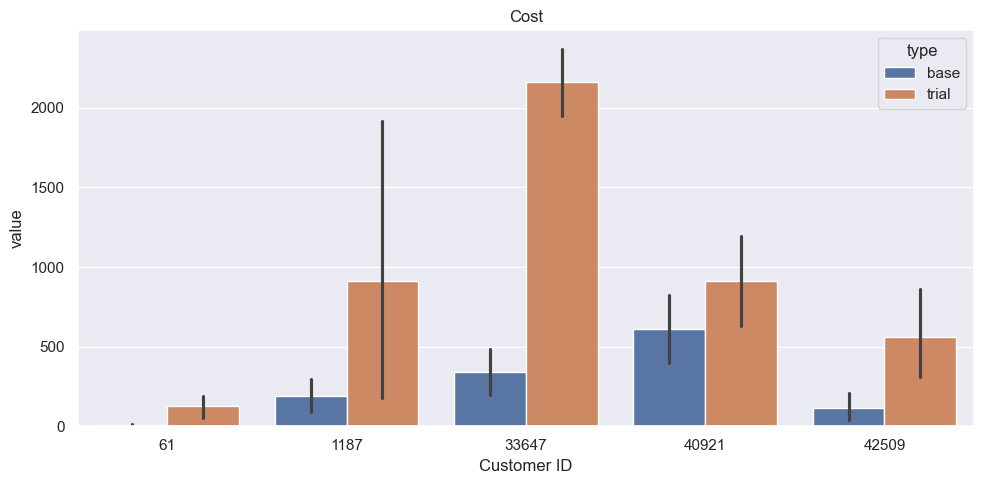

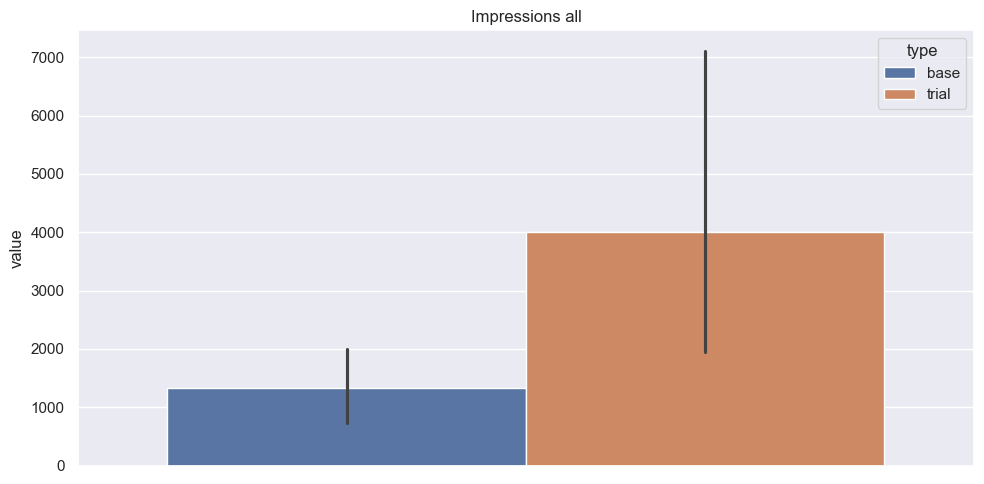

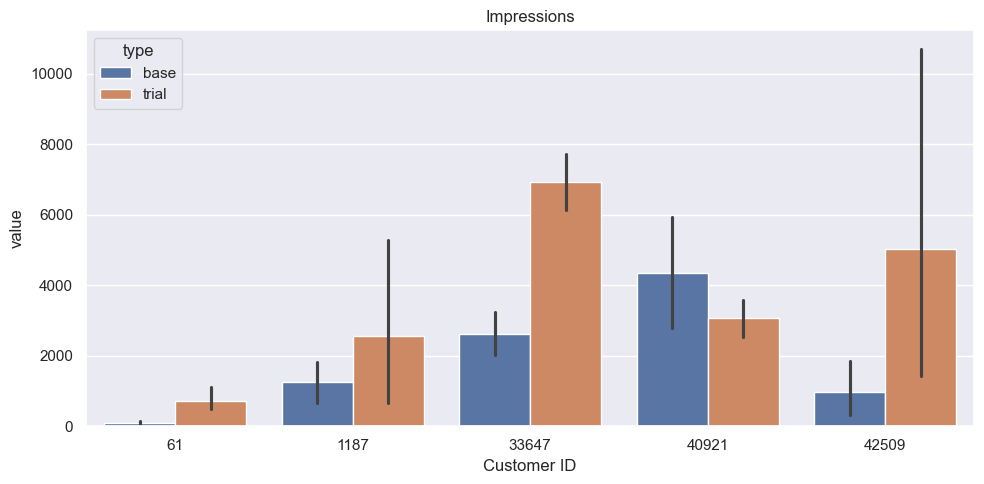

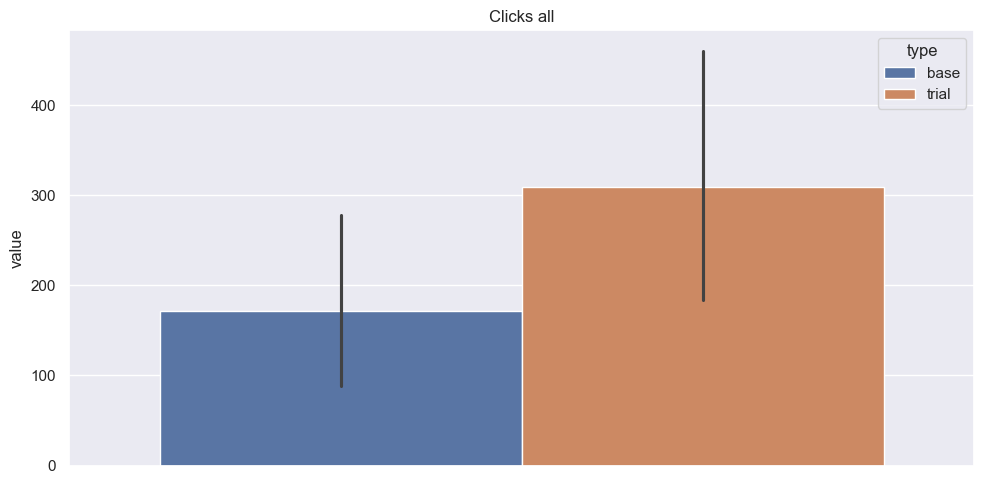

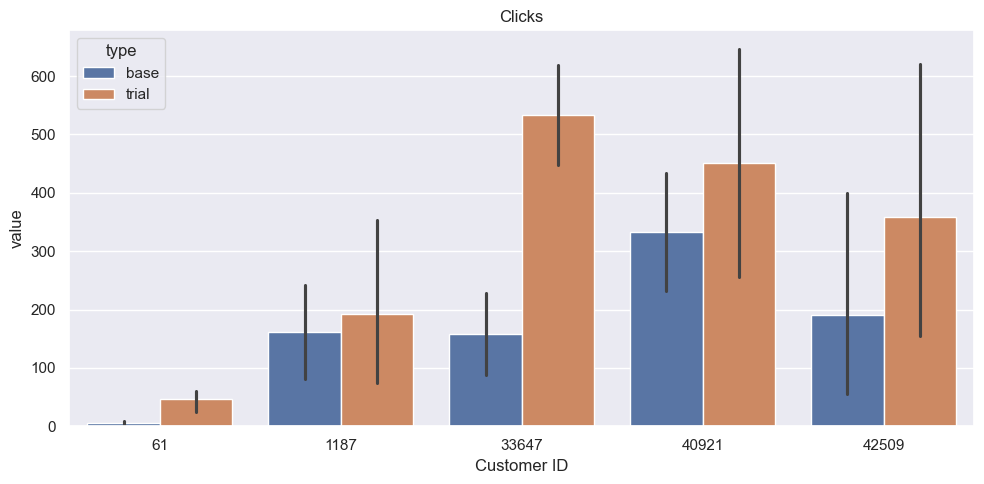

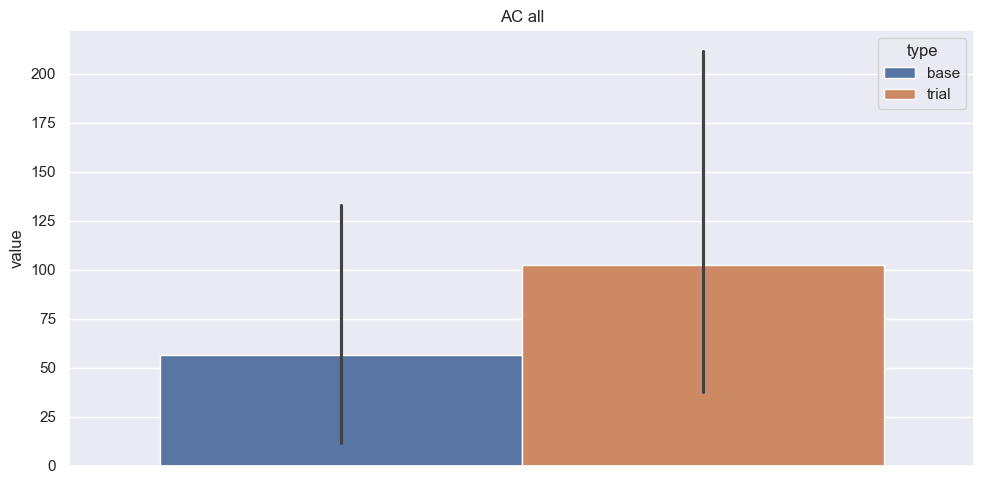

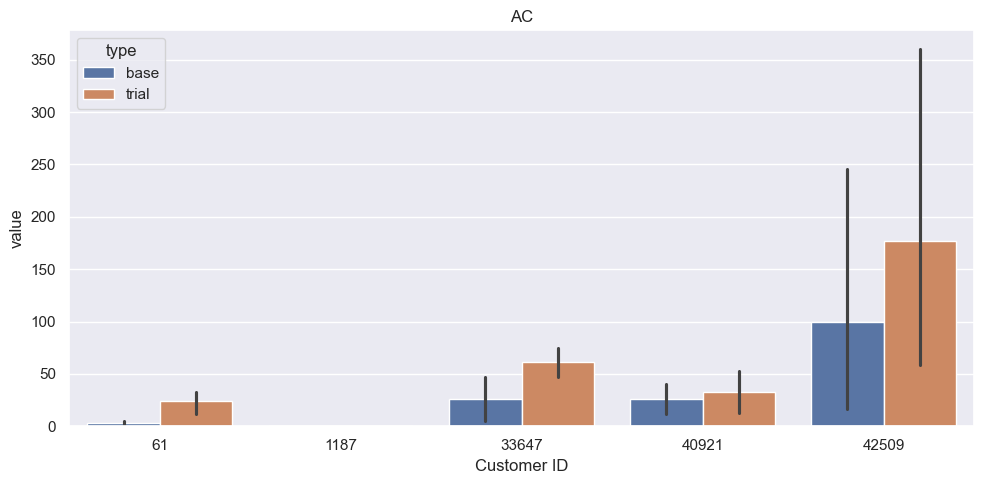

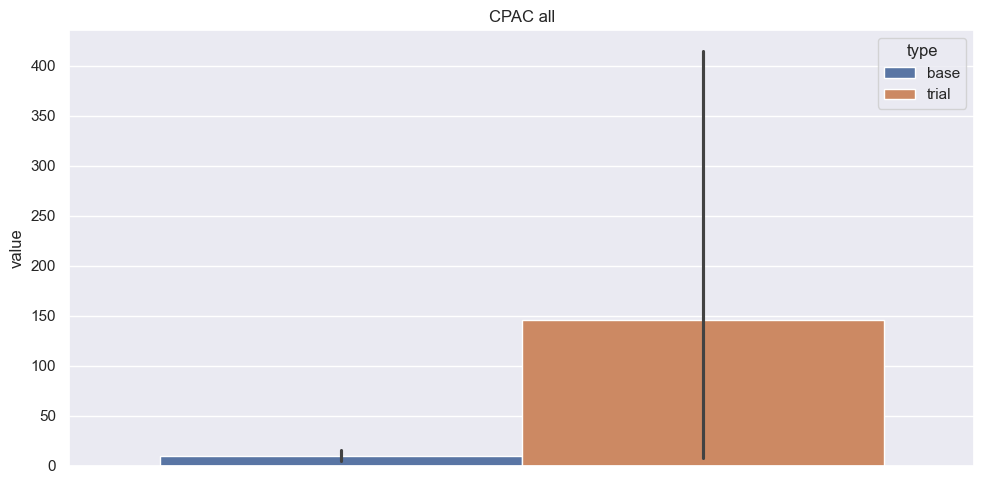

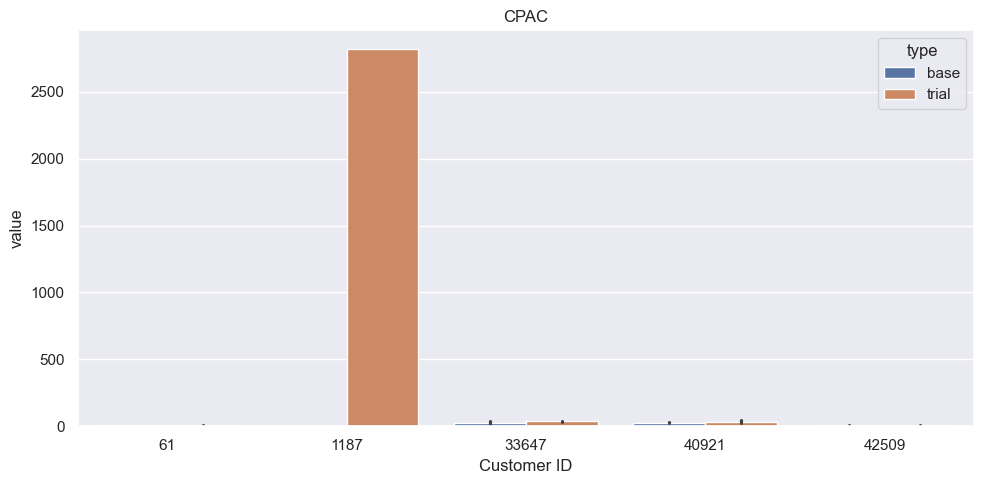

In [6]:
for elem in ['Cost', 'Impressions', 'Clicks', 'AC', 'CPAC']:
    base = pd.DataFrame(df[['Customer ID',f'Base {elem}']])
    base['type'] = 'base'
    base = base.rename(columns={f'Base {elem}':'value'})

    trial = pd.DataFrame(df[['Customer ID',f'Trial {elem}']])
    trial['type'] = 'trial'
    trial = trial.rename(columns={f'Trial {elem}':'value'})

    final = pd.concat([base, trial]).reset_index(drop = True)

    plt.figure(figsize = (10, 5))
    plt.title(elem+' all')
    sns.barplot(data = final,
                #x = 'Customer ID', 
                y = 'value',
                hue = 'type')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize = (10, 5))
    plt.title(elem)
    sns.barplot(data = final,
                x = 'Customer ID', 
                y = 'value',
                hue = 'type')
    plt.tight_layout()
    plt.show()